# Chapter 6. AI 기초 - Classification2
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Decision Tree

## Data

In [2]:
from sklearn.datasets import load_iris

In [3]:
raw_data = load_iris()

X = raw_data.data
Y = raw_data.target

## Modeling

In [4]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [5]:
dtc_model = DTC(max_depth = 6)
dtc_model.fit(X[:,[0,2]], Y)

DecisionTreeClassifier(max_depth=6)

## Visualization

In [6]:
from sklearn.tree import plot_tree

[Text(0.375, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2916666666666667, 0.7857142857142857, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.4583333333333333, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.25, 0.6428571428571429, 'sepal length (cm) <= 4.95\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(0.16666666666666666, 0.5, 'petal length (cm) <= 3.9\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.08333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.6428571428571429, 

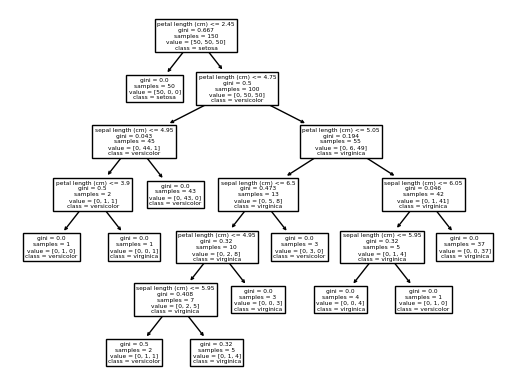

In [7]:
plot_tree(dtc_model, 
          feature_names = raw_data.feature_names[::2],
          class_names = raw_data.target_names)

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[np.ravel([y == cl]), 0],
                    y=X[np.ravel([y == cl]), 1],
                    alpha=0.8,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('sepal length(cm)')
    plt.ylabel('petal length(cm)')

    plt.legend()
    plt.show()

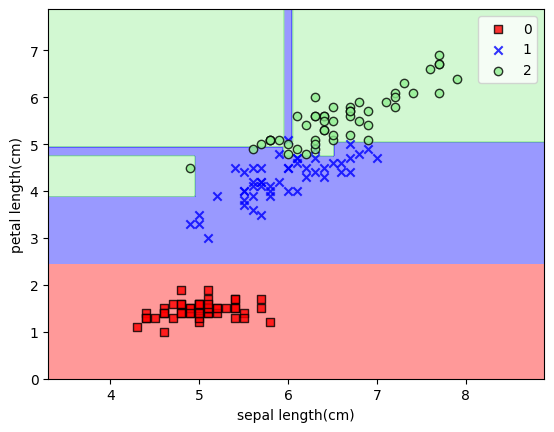

In [9]:
plot_decision_regions(X[:,[0,2]], Y, dtc_model)

# 2. Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [11]:
rfc_model = RFC(max_depth=4,
                n_estimators=25,
                n_jobs=-1,
                random_state=1)
rfc_model.fit(X[:,[0,2]], Y)

RandomForestClassifier(max_depth=4, n_estimators=25, n_jobs=-1, random_state=1)

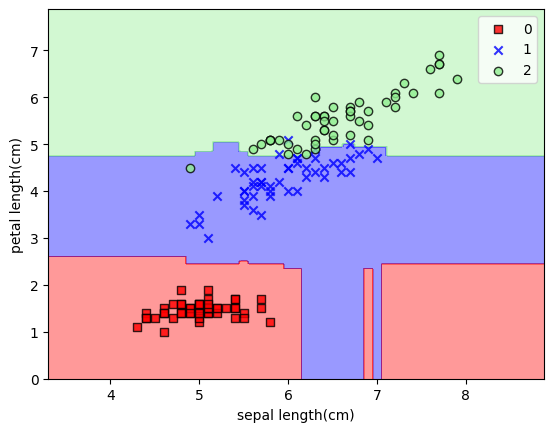

In [12]:
plot_decision_regions(X[:,[0,2]], Y, rfc_model)

# 3. Support Vector Machine
* 분류에서 가장 안정적인 주요 학습 방법 중 하나
* 값의 Scale애 민감하기 때문에 Scaler를 적용한 후 모델링을 진행하는 것이 좋음

## Data 

In [13]:
raw_data = load_iris()

X = raw_data.data
Y = raw_data.target

In [14]:
from sklearn.preprocessing import StandardScaler as SS

In [15]:
ss = SS()
X_ss = ss.fit_transform(X[:,[0,2]])

## Modeling

### 선형

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC(kernel='linear',
          C=1,
          random_state=1)
svc.fit(X_ss, Y)

SVC(C=1, kernel='linear', random_state=1)

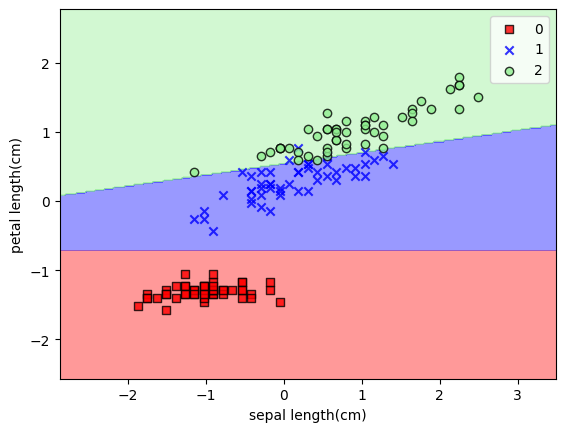

In [18]:
plot_decision_regions(X_ss, Y, svc)

### 비선형

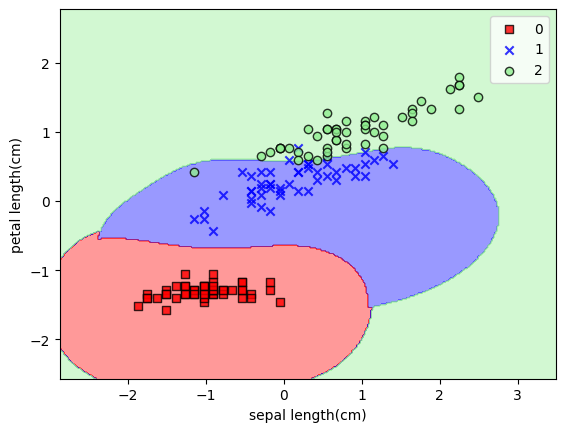

In [19]:
svc = SVC(kernel='rbf',
          C=1,            # C가 작을수록 과소적합
          gamma=1,        # gamma가 클수록 과대적합
          random_state=1)
svc.fit(X_ss, Y)

plot_decision_regions(X_ss, Y, svc)

# 4. Feature Importance

In [20]:
from sklearn.datasets import load_wine

In [21]:
raw_data = load_wine()
X = raw_data.data
Y = raw_data.target

rfc_model = RFC(n_estimators=500,
                random_state=1)
rfc_model.fit(X, Y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
rfc_model.feature_importances_

array([0.13251384, 0.02827689, 0.01344608, 0.02252494, 0.03250827,
       0.04989197, 0.15702209, 0.00993048, 0.022782  , 0.14978792,
       0.07799231, 0.12712682, 0.17619639])

In [23]:
np.sort(rfc_model.feature_importances_)

array([0.00993048, 0.01344608, 0.02252494, 0.022782  , 0.02827689,
       0.03250827, 0.04989197, 0.07799231, 0.12712682, 0.13251384,
       0.14978792, 0.15702209, 0.17619639])

In [24]:
for i in np.argsort(rfc_model.feature_importances_) :
    print(raw_data.feature_names[i])

nonflavanoid_phenols
ash
alcalinity_of_ash
proanthocyanins
malic_acid
magnesium
total_phenols
hue
od280/od315_of_diluted_wines
alcohol
color_intensity
flavanoids
proline


## MY

Text(0, 0.5, '변수')

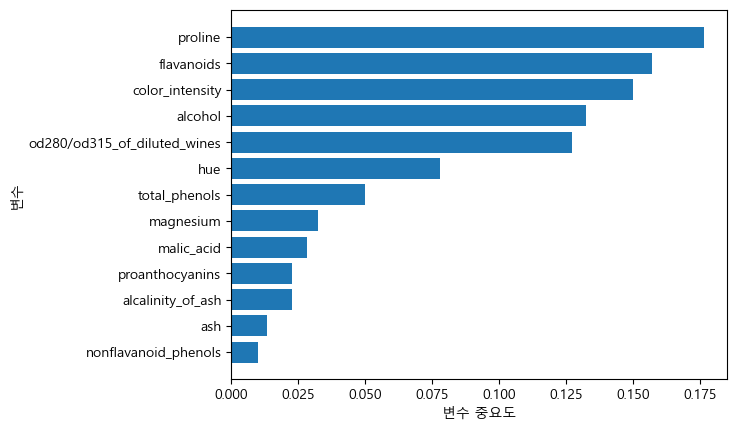

In [25]:
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

imp = pd.DataFrame()
imp['Feature'] = raw_data.feature_names
imp['Importance'] = rfc_model.feature_importances_

imp.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(imp))
plt.barh(y = coordinates, width = imp['Importance'])
plt.yticks(coordinates, imp['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

## Answer

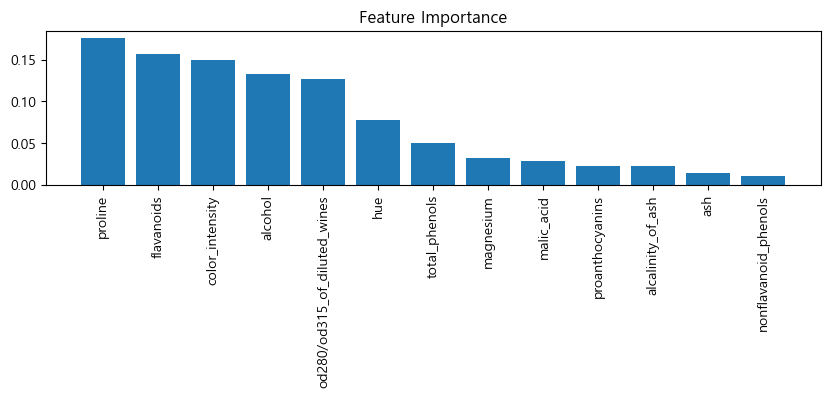

In [26]:
index = np.argsort(rfc_model.feature_importances_)[::-1]

plt.figure(figsize = (10,2))

plt.bar(np.array(raw_data.feature_names)[index],
        rfc_model.feature_importances_[index])
plt.title('Feature Importance')
plt.xticks(rotation = 90)
plt.show()

# 5. 차원축소
* 주성분분석(PCA) : 비지도 기법
* 선형판별분석(LDA) : 지도 기법 - PCA에 비해 성능은 좋지만 정답이 없으면 진행이 어렵다.
* 단점 : 정보가 겹칠 때 ex) 키, 몸무게, BMI PCA, LDA도 정보가 겹친다.

## PCA

In [27]:
raw_data = load_iris()

X = raw_data.data
Y = raw_data.target

In [28]:
from sklearn.decomposition import PCA

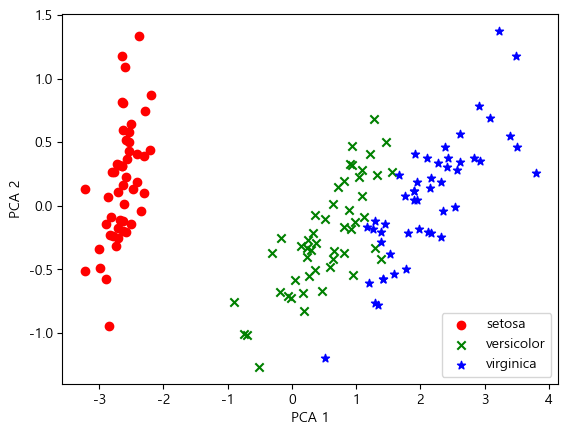

In [29]:
pca_model = PCA(n_components=2)
X_pca = pca_model.fit_transform(X)

plt.figure()

plt.scatter(X_pca[Y == 0,0], X_pca[Y == 0,1], color = 'r', marker = 'o', label = 'setosa')
plt.scatter(X_pca[Y == 1,0], X_pca[Y == 1,1], color = 'g', marker = 'x', label = 'versicolor')
plt.scatter(X_pca[Y == 2,0], X_pca[Y == 2,1], color = 'b', marker = '*', label = 'virginica')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

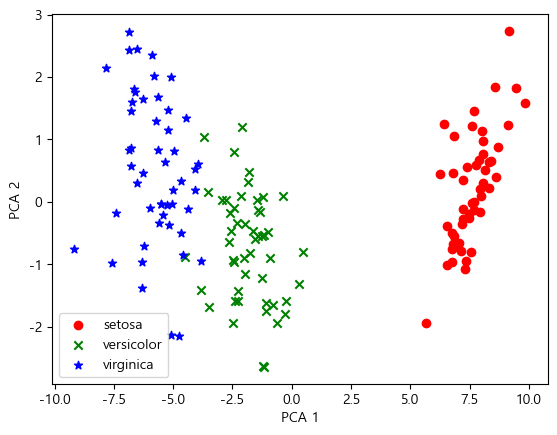

In [31]:
lda_model = LDA(n_components=2)
X_lda = lda_model.fit_transform(X, Y)

plt.figure()

plt.scatter(X_lda[Y == 0,0], X_lda[Y == 0,1], color = 'r', marker = 'o', label = 'setosa')
plt.scatter(X_lda[Y == 1,0], X_lda[Y == 1,1], color = 'g', marker = 'x', label = 'versicolor')
plt.scatter(X_lda[Y == 2,0], X_lda[Y == 2,1], color = 'b', marker = '*', label = 'virginica')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# 6. 일반적인 데이터 분석 및 모델링 순서
* ML workflow : https://wikidocs.net/31947
1. 데이터 수집 : 센서
2. 데이터 가공 및 통계 : numpy, pandas
3. 데이터 전처리 1 : 결측치, 이상치, 중복값, etc - numpy, pandas
4. 데이터 분리 : train_test_split - sklean
5. 데이터 전처리 2 : Scaling, Encoding - numpy, pandas, sklean
6. 변수 선택 : 상관분석, 차원축소, 특성 중요도 - pandas, sklean
7. 모델 선택 및 하이퍼 파라미터 조정 - sklean
8. 커널 트릭 및 모델 학습(비선형인 경우에만)
9. 모델 테스트(4~8 과정에 따라 transform, predict)

# 7. 커널 트릭
* circle 데이터처럼 겹치는 부분이 없는 것을 해결하기 위한 방법이 커널 트릭

## Ex 1. moons data

In [32]:
from sklearn.datasets import make_moons, make_circles

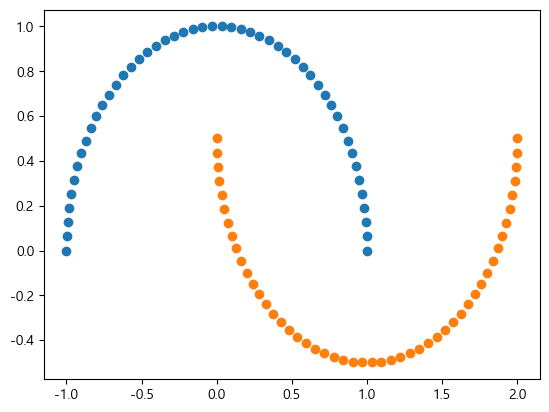

In [33]:
X, Y = make_moons(n_samples=100,
                  random_state=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])

plt.show()

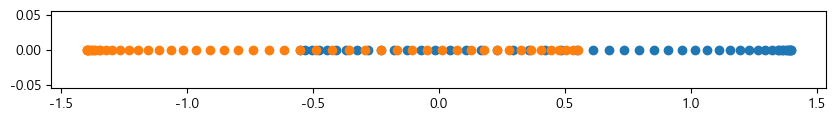

In [34]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize = (10,1))

plt.scatter(X_pca[Y == 0, 0], np.zeros_like(X_pca[Y == 0, 0]))
plt.scatter(X_pca[Y == 1, 0], np.zeros_like(X_pca[Y == 1, 0]))

plt.show()

In [35]:
from sklearn.decomposition import KernelPCA

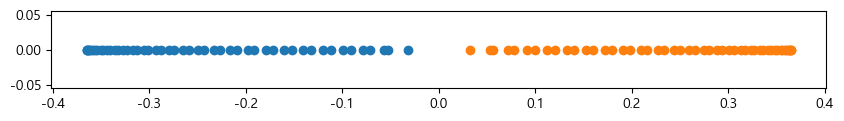

In [36]:
X, Y = make_moons(n_samples=100,
                  random_state=1)

kpca = KernelPCA(n_components=2,
                 kernel='rbf',
                 gamma=15)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize = (10,1))

plt.scatter(X_kpca[Y == 0, 0], np.zeros_like(X_kpca[Y == 0, 0]))
plt.scatter(X_kpca[Y == 1, 0], np.zeros_like(X_kpca[Y == 1, 0]))

plt.show()

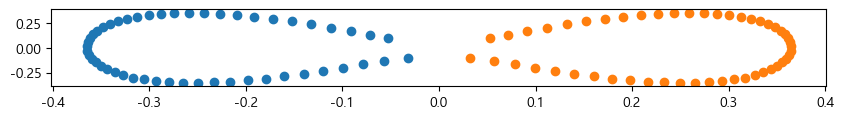

In [37]:
plt.figure(figsize = (10,1))

plt.scatter(X_kpca[Y == 0, 0], X_kpca[Y == 0, 1])
plt.scatter(X_kpca[Y == 1, 0], X_kpca[Y == 1, 1])

plt.show()

## Ex 2. circle data

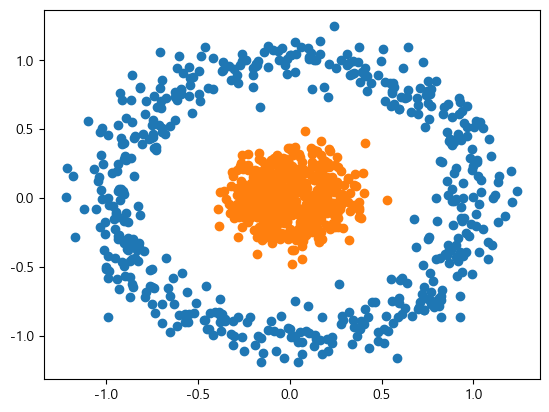

In [38]:
X, Y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])

plt.show()

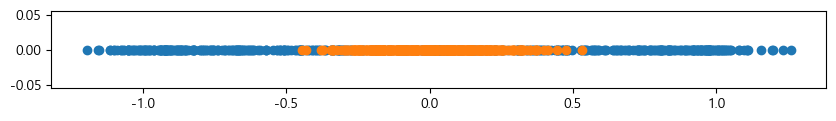

In [39]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize = (10,1))

plt.scatter(X_pca[Y == 0, 0], np.zeros_like(X_pca[Y == 0, 0]))
plt.scatter(X_pca[Y == 1, 0], np.zeros_like(X_pca[Y == 1, 0]))

plt.show()

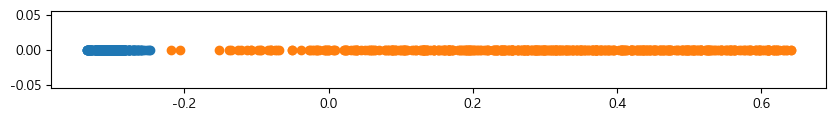

In [40]:
X, Y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=1)

kpca = KernelPCA(n_components=2,
                 kernel='rbf',
                 gamma=15)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize = (10,1))

plt.scatter(X_kpca[Y == 0, 0], np.zeros_like(X_kpca[Y == 0, 0]))
plt.scatter(X_kpca[Y == 1, 0], np.zeros_like(X_kpca[Y == 1, 0]))

plt.show()

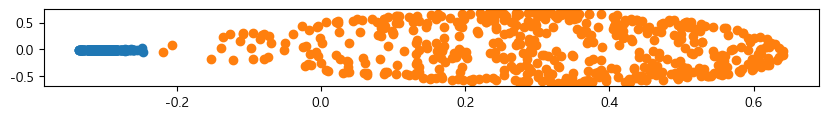

In [41]:
plt.figure(figsize = (10,1))

plt.scatter(X_kpca[Y == 0, 0], X_kpca[Y == 0, 1])
plt.scatter(X_kpca[Y == 1, 0], X_kpca[Y == 1, 1])

plt.show()